In [6]:
#Importing necessary libraries that will be used in analysis
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import pyodbc 

# Importing Data from SQL Server database

In [8]:
#Connecting to SQL Server database and importing data from it.

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-83C9HQI\SQLEXPRESS;'
                      'Database=Covid19_project;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()         
sql_query = pd.read_sql_query('SELECT * FROM Covid19_project.dbo.covid_vaccine_statewise$',conn)  #selecting all data from table
print(sql_query)
print(type(sql_query))

           Date       State  Total Doses Administered  \
0    2021-01-16       India                   48276.0   
1    2021-01-17       India                   58604.0   
2    2021-01-18       India                   99449.0   
3    2021-01-19       India                  195525.0   
4    2021-01-20       India                  251280.0   
5    2021-01-21       India                  365965.0   
6    2021-01-22       India                  549381.0   
7    2021-01-23       India                  759008.0   
8    2021-01-24       India                  835058.0   
9    2021-01-25       India                 1277104.0   
10   2021-01-26       India                 1293784.0   
11   2021-01-27       India                 1726490.0   
12   2021-01-28       India                 2295491.0   
13   2021-01-29       India                 2814803.0   
14   2021-01-30       India                 3067736.0   
15   2021-01-31       India                 3127107.0   
16   2021-02-01       India    

In [9]:
sql_query.columns      #Checking columns in table

Index(['Date', 'State', 'Total Doses Administered', 'First Dose Administered',
       'Second Dose Administered', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Covaxin Administered', 'Total CoviShield Administered',
       'Total Sputnik V Administered', 'Youth', 'MiddleAge', 'SeniorCitizen',
       'Total Individuals Vaccinated'],
      dtype='object')

In [10]:
covid_df = pd.DataFrame(sql_query,columns=sql_query.columns)  #Converting that into a pandas dataframe

In [11]:
covid_df.head()

,Date,State,Total Doses Administered,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,Youth,MiddleAge,SeniorCitizen,Total Individuals Vaccinated
0,2021-01-16,India,48276.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,None,NaN,NaN,NaN,48276.0
1,2021-01-17,India,58604.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,None,NaN,NaN,NaN,58604.0
2,2021-01-18,India,99449.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,None,NaN,NaN,NaN,99449.0
3,2021-01-19,India,195525.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,None,NaN,NaN,NaN,195525.0
4,2021-01-20,India,251280.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,None,NaN,NaN,NaN,251280.0


In [12]:
covid_df.to_csv("Covid_vaccine_india.csv")     #Importing it to a specific csv file for future.

# Data Cleaning and Preprocessing

In [6]:
covid_df.shape    #Checking shape of dataframe 

(6699, 15)

In [7]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 15 columns):
Date                                   6699 non-null datetime64[ns]
State                                  6699 non-null object
Total Doses Administered               6364 non-null float64
First Dose Administered                6363 non-null float64
Second Dose Administered               6363 non-null float64
Male(Individuals Vaccinated)           6363 non-null float64
Female(Individuals Vaccinated)         6363 non-null float64
Transgender(Individuals Vaccinated)    6363 non-null float64
Total Covaxin Administered             6363 non-null float64
Total CoviShield Administered          6363 non-null float64
Total Sputnik V Administered           1737 non-null object
Youth                                  4177 non-null float64
MiddleAge                              4178 non-null float64
SeniorCitizen                          4178 non-null float64
Total Individuals Vaccinated      

In [8]:
covid_df.describe()    #Checking the stastistics of various columns in dataframe

,Total Doses Administered,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Youth,MiddleAge,SeniorCitizen,Total Individuals Vaccinated
count,6.364000e+03,6.363000e+03,6.363000e+03,6.363000e+03,6.363000e+03,6363.000000,6.363000e+03,6.363000e+03,4.177000e+03,4.178000e+03,4.178000e+03,6.363000e+03
mean,6.413310e+06,5.254151e+06,1.160167e+06,2.919990e+06,2.568098e+06,835.393368,6.928136e+05,5.707424e+06,1.955834e+06,3.275439e+06,2.887759e+06,5.265380e+06
std,2.615880e+07,2.132565e+07,4.882363e+06,1.225694e+07,1.064744e+07,3737.993697,2.991176e+06,2.319046e+07,8.448696e+06,1.095290e+07,9.204842e+06,2.132828e+07
min,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,1.059000e+03,1.136000e+03,5.580000e+02,7.000000e+00
25%,9.749425e+04,8.277550e+04,6.405500e+03,4.299600e+04,3.760850e+04,4.000000,0.000000e+00,9.561450e+04,6.454900e+04,1.017950e+05,6.404975e+04,8.277550e+04
50%,5.369145e+05,4.589680e+05,7.715800e+04,2.581390e+05,2.392390e+05,69.000000,4.760000e+03,4.989140e+05,3.382580e+05,9.198940e+05,8.211470e+05,4.705490e+05
75%,4.872305e+06,4.119336e+06,7.264175e+05,2.203892e+06,1.961909e+06,562.000000,4.669140e+05,4.258910e+06,1.068349e+06,2.727498e+06,2.533357e+06,4.119336e+06
max,3.561929e+08,2.901329e+08,6.606008e+07,1.911604e+08,1.649711e+08,61451.000000,4.401880e+07,3.120454e+08,1.361586e+08,1.229163e+08,9.711800e+07,2.901329e+08


In [9]:
covid_df.isnull().sum()  #Checking null values, we can drop Sputnik V and Transgender columns as this is of no use.
# After null values we need to fill manually in future as we can't fill it with mean or median of that column

Date                                      0
State                                     0
Total Doses Administered                335
First Dose Administered                 336
Second Dose Administered                336
Male(Individuals Vaccinated)            336
Female(Individuals Vaccinated)          336
Transgender(Individuals Vaccinated)     336
Total Covaxin Administered              336
Total CoviShield Administered           336
Total Sputnik V Administered           4962
Youth                                  2522
MiddleAge                              2521
SeniorCitizen                          2521
Total Individuals Vaccinated            336
dtype: int64

In [10]:
# Dropping Sputnik V column as it has most of its rows null. And we also know that till this time sputnik V vaccination has not started
# Dropping Transgender column as no data is there for them.

covid_df = covid_df.drop(columns=['Total Sputnik V Administered','Transgender(Individuals Vaccinated)'],axis=1)




In [12]:
#Removing data of 'India' in State as we want to analyze data based on the different states in india
covid_vaccine=covid_df[covid_df.State!='India']
covid_vaccine.head()

,Date,State,Total Doses Administered,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,Youth,MiddleAge,SeniorCitizen,Total Individuals Vaccinated
183,2021-01-16,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,None,NaN,NaN,NaN,23.0
184,2021-01-17,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,None,NaN,NaN,NaN,23.0
185,2021-01-18,Andaman and Nicobar Islands,42.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,None,NaN,NaN,NaN,42.0
186,2021-01-19,Andaman and Nicobar Islands,89.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,None,NaN,NaN,NaN,89.0
187,2021-01-20,Andaman and Nicobar Islands,124.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,None,NaN,NaN,NaN,124.0


In [13]:
# Converting date column to datetime dtype
covid_vaccine['Date'] = pd.to_datetime(covid_vaccine['Date'], format = '%d/%m/%Y')
current_date = max(covid_vaccine['Date'])    #Checking the latest date in dataset
print("Current Date : ", current_date)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Current Date :  2021-07-15 00:00:00


In [14]:
#Renaming the column

covid_vaccine.rename(columns = {"Total Individuals Vaccinated": "Total Vaccination"}, inplace = True)
covid_vaccine.rename(columns = {"Male(Individuals Vaccinated)": "Male"}, inplace = True)
covid_vaccine.rename(columns = {"Female(Individuals Vaccinated)": "Female"}, inplace = True)

F:\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [14]:
covid_vaccine.isnull().sum()

Date                                0
State                               0
Total Doses Administered          324
First Dose Administered           325
Second Dose Administered          325
Male                              325
Female                            325
Total Covaxin Administered        325
Total CoviShield Administered     325
Youth                            2452
MiddleAge                        2451
SeniorCitizen                    2451
Total Vaccination                 325
dtype: int64

# Exploratory Data Analysis

In [15]:
# Showing the vaccination progress till now in different states, taking max vaccination till now

covid_vaccine_progress =covid_vaccine.groupby('State')['Total Vaccination'].max().reset_index().sort_values(['Total Vaccination'],ascending=False)
covid_vaccine_progress

,State,Total Vaccination
33,Uttar Pradesh,29305008.0
20,Maharashtra,27659911.0
28,Rajasthan,21454435.0
10,Gujarat,21181190.0
15,Karnataka,20169876.0
19,Madhya Pradesh,18792034.0
35,West Bengal,17382673.0
4,Bihar,15046903.0
30,Tamil Nadu,14224524.0
1,Andhra Pradesh,13298596.0


In [16]:
# Taking top 10 rows for analysis
vaccine10 = covid_vaccine_progress.head(10)

No handles with labels found to put in legend.


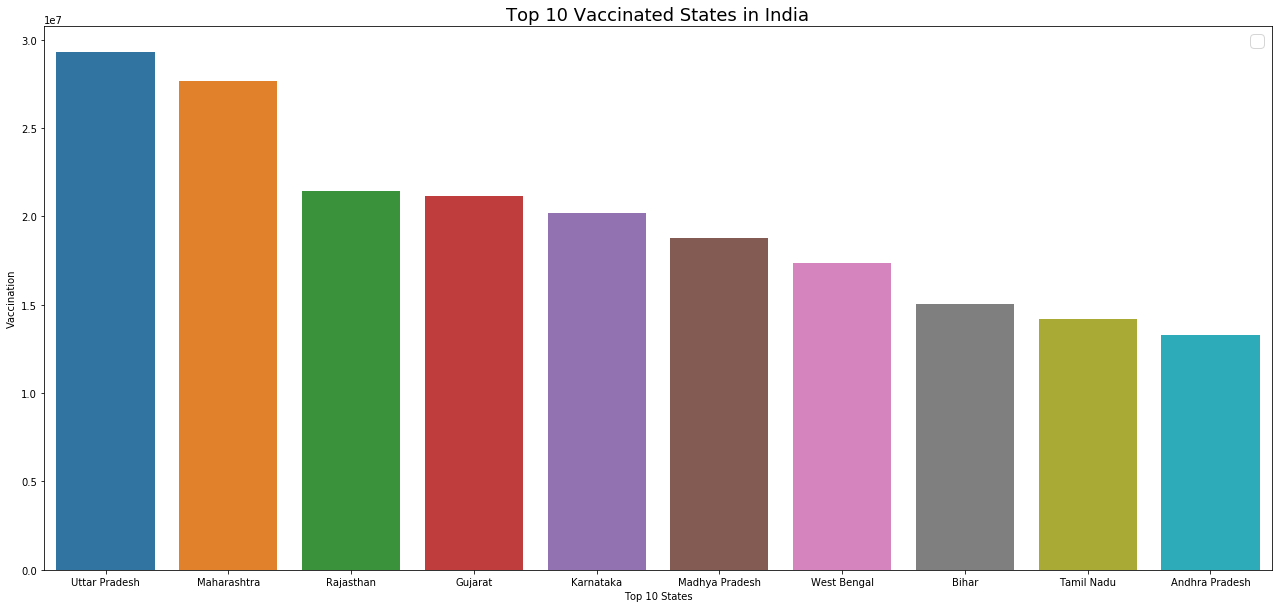

In [17]:
# Showing top 10 states that have maximum number of vaccinations till now 
fig,ax = plt.subplots(figsize=(22, 10))
sb.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sb.barplot(x="State", y="Total Vaccination", data=vaccine10)
ax.set_ylabel(ylabel = 'Vaccination', fontsize = 10)
ax.set_xlabel(xlabel = 'Top 10 States', fontsize = 10)
ax.set_title('Top 10 Vaccinated States in India')
ax.legend();

Conclusion:-
    
From above bar chart, we found that Uttar Pradesh,Maharastra, Rajasthan followed by Gujarat and others are top vaccinated states in India

In [16]:
#Adding population column to check the vaccine percent as per population.
covid_vaccine_progress['Population'] = [237882725,123144223,81032689,63872399,67562686,85358965,99609303,124799926,77841267,53903393,
                                       35699443,46356334,38510982,28204692,29436231,18710992,35607039,38593948,30141373,13606320,11250858,
                                       7451955,4169794,1586250,3091545,3366710,1570458,1239244,2249695,1158473,1413542,615724,690251,289023,
                                       417036,73183]
covid_vaccine_progress

,State,Total Vaccination,Population
33,Uttar Pradesh,29305008.0,237882725
20,Maharashtra,27659911.0,123144223
28,Rajasthan,21454435.0,81032689
10,Gujarat,21181190.0,63872399
15,Karnataka,20169876.0,67562686
19,Madhya Pradesh,18792034.0,85358965
35,West Bengal,17382673.0,99609303
4,Bihar,15046903.0,124799926
30,Tamil Nadu,14224524.0,77841267
1,Andhra Pradesh,13298596.0,53903393


In [18]:
covid_vaccine_progress['Percent_Vaccinated'] = np.round((covid_vaccine_progress['Total Vaccination']/covid_vaccine_progress['Population'])*100, decimals = 4)

In [25]:
covid_vaccine_progress.sort_values('Percent_Vaccinated',axis=0,ascending=False,inplace=True)
covid_vaccine_progress

,State,Total Vaccination,Population,Percent_Vaccinated
7,Dadra and Nagar Haveli and Daman and Diu,437350.0,615724,71.0302
18,Lakshadweep,47468.0,73183,64.8621
29,Sikkim,428512.0,690251,62.0806
17,Ladakh,177760.0,289023,61.5038
9,Goa,880174.0,1586250,55.4877
32,Tripura,2017943.0,4169794,48.3943
12,Himachal Pradesh,3398020.0,7451955,45.5990
23,Mizoram,554889.0,1239244,44.7764
5,Chandigarh,472038.0,1158473,40.7466
0,Andaman and Nicobar Islands,161400.0,417036,38.7017


So, we can see that Union Territory like Daman and Diu,Laksadweep are most vaccinated as per population because they have less population, however big states like Bihar, Uttar Pradesh, Jharkand and West Bengal are least vaccinated as per population.

# 10 least vaccinated states by number

In [18]:
# Taking least vaccinated states for analysis
least10 = covid_vaccine_progress.tail(10)

No handles with labels found to put in legend.


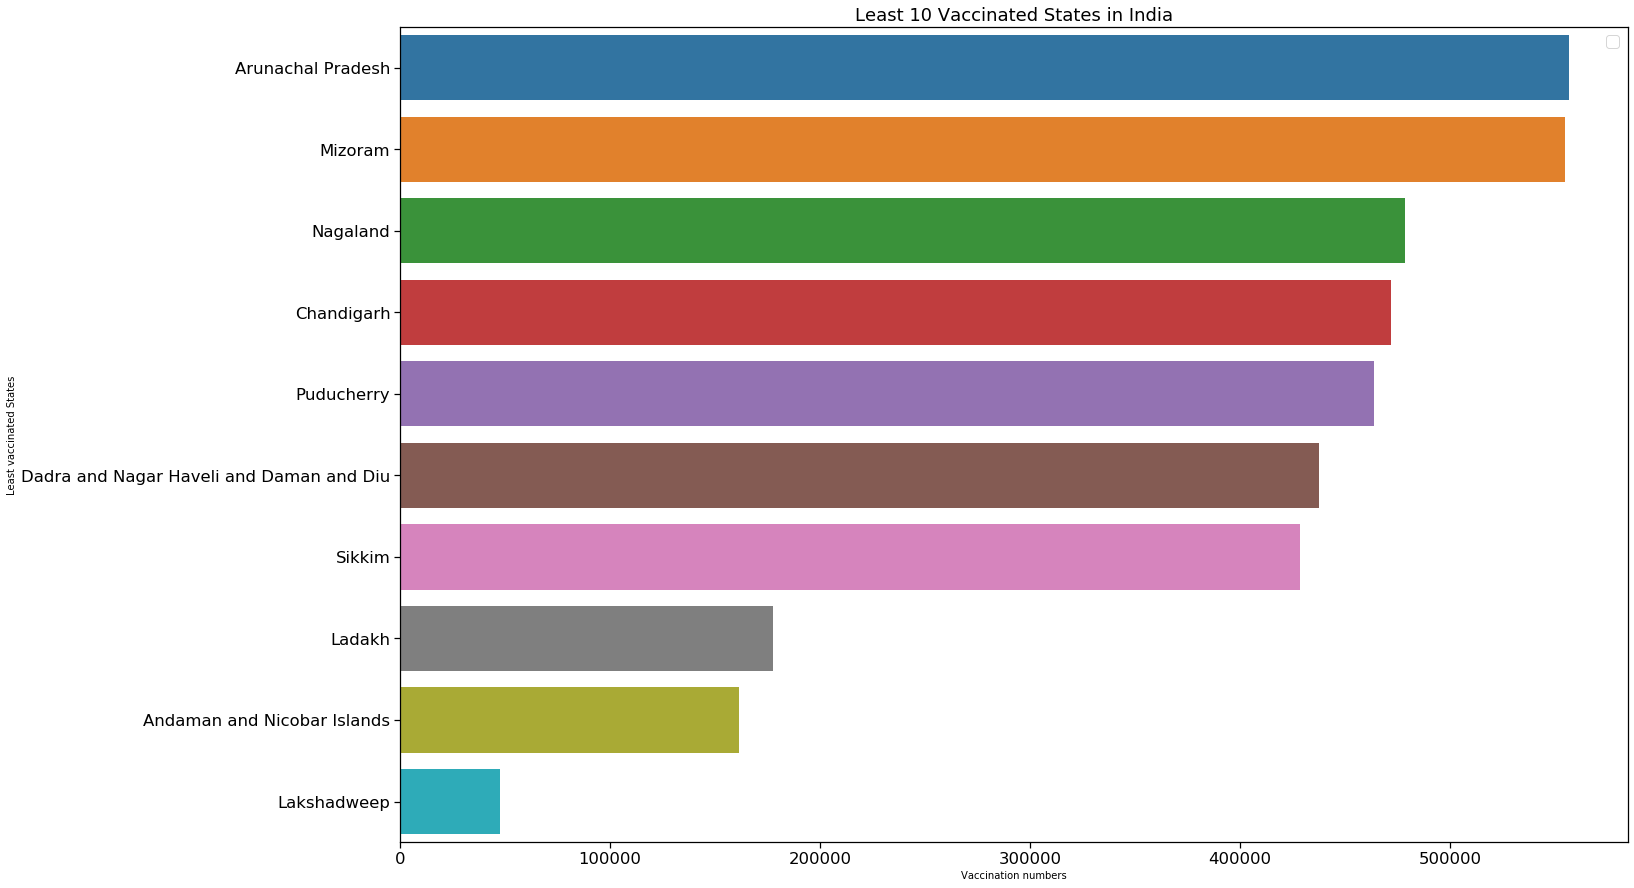

In [19]:
# Showing least 10 states that have taken vaccinations till now 
fig,ax = plt.subplots(figsize=(22, 15))
sb.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sb.barplot(x="Total Vaccination", y="State", data=least10)
ax.set_ylabel(ylabel = 'Least vaccinated States', fontsize = 10)
ax.set_xlabel(xlabel = 'Vaccination numbers', fontsize = 10)
ax.set_title('Least 10 Vaccinated States in India')
ax.legend();

Conclusion:-

So from above chart, we found out we need to concentrate on these states as these are the least vaccinated states and as per population also. This includes Arunchal pradesh,Nagaland and mizoram from north east and some union territory.



# Doses Administered vs People Vaccinated

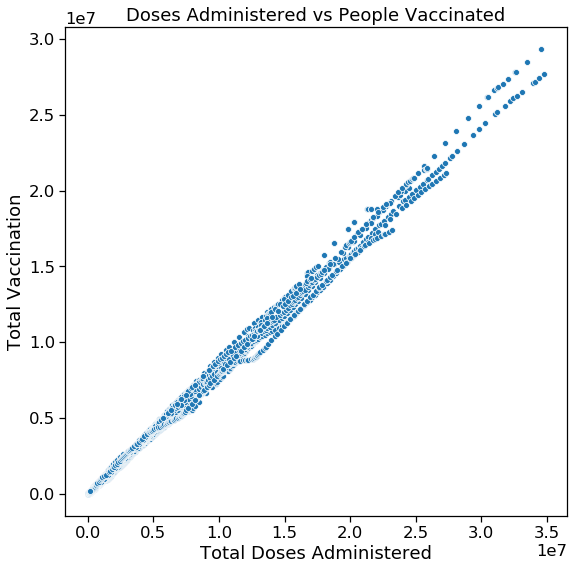

In [20]:
# Plotting total doses administered vs People who got vaccinated

fig= plt.figure(figsize=(9,9))
sb.scatterplot(x='Total Doses Administered',y='Total Vaccination',data=covid_vaccine)
plt.title('Doses Administered vs People Vaccinated')
plt.show()

Conclusion:-
    
From above scatterplot, we found that doses administered is linearly proportional to people vaccinated in India. And as the people are boking the doses, they are vaccinating themselves also.

# Different types of vaccination taken in India

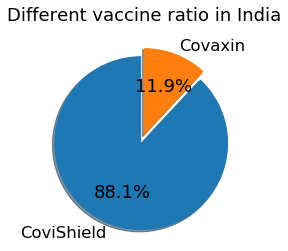

In [21]:
# Anaylsis of different type of vaccines in India

covishield = covid_vaccine["Total CoviShield Administered"].max()   #Taking max vaccine of covishield vaccine as it is added up in each row
covaxin = covid_vaccine["Total Covaxin Administered"].max()         #Taking max vaccine of covaxin vaccine as it is added up in each row
sizes = [covishield,covaxin]
labels = 'CoviShield','Covaxin'
explode = (0.1, 0)

plt.pie(sizes, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', startangle=90)
plt.title('Different vaccine ratio in India')
plt.show()

Conclusion: -

So, Covishield is the most used vaccine in India by 88.1% people and Covaxin taken by 11.9% people of India

# Top 10 States that have taken Covishield vaccine

In [22]:
# Joining columns State and Covishield in descending order for analysis

covishield10 =covid_vaccine.groupby('State')['Total CoviShield Administered'].max().reset_index().sort_values(['Total CoviShield Administered'],ascending=False)
covishield10 = covishield10.head(10)

No handles with labels found to put in legend.


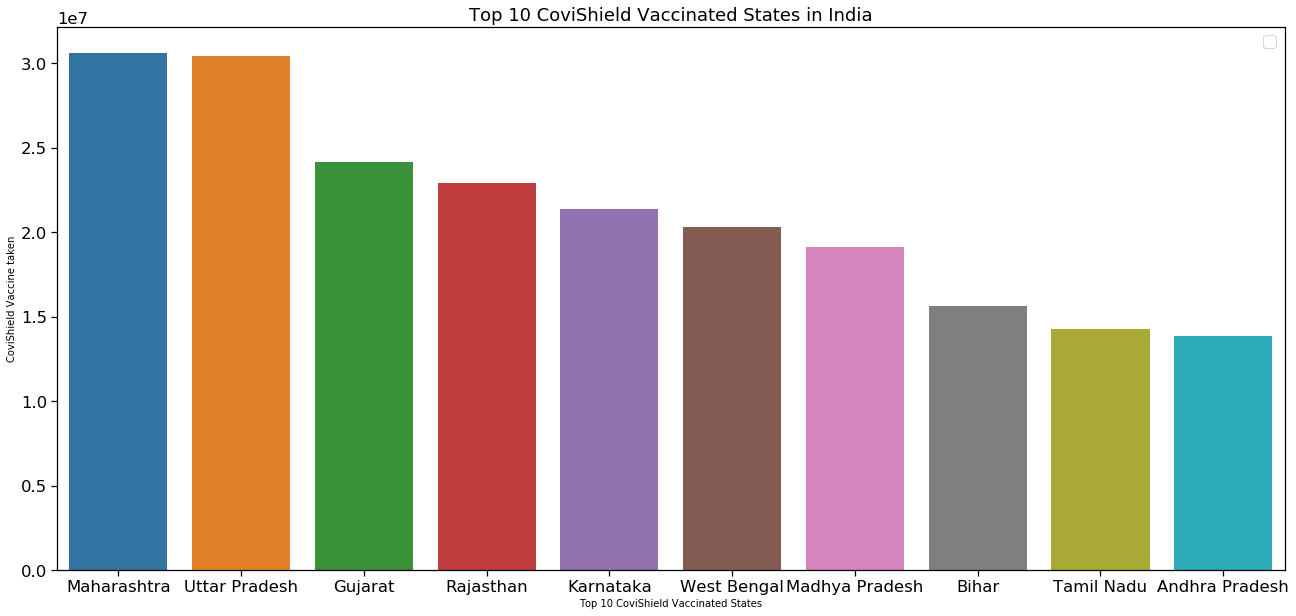

In [23]:
# Showing top 10 states that have taken covishield vaccination 
fig,ax = plt.subplots(figsize=(22, 10))
sb.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sb.barplot(x="State", y="Total CoviShield Administered", data=covishield10)
ax.set_ylabel(ylabel = 'CoviShield Vaccine taken', fontsize = 10)
ax.set_xlabel(xlabel = 'Top 10 CoviShield Vaccinated States', fontsize = 10)
ax.set_title('Top 10 CoviShield Vaccinated States in India')
ax.legend();

Conclusion:-

So, Maharashtra, Uttar Pradesh followed by Gujarat and Rajasthan is the most covishield vaccinated states in India

# Top 10 States that have taken Covaxin vaccine

In [24]:
# Joining columns State and Covaxin in descending order for analysis

covaxin10 =covid_vaccine.groupby('State')['Total Covaxin Administered'].max().reset_index().sort_values(['Total Covaxin Administered'],ascending=False)
covaxin10 = covaxin10.head(10)

No handles with labels found to put in legend.


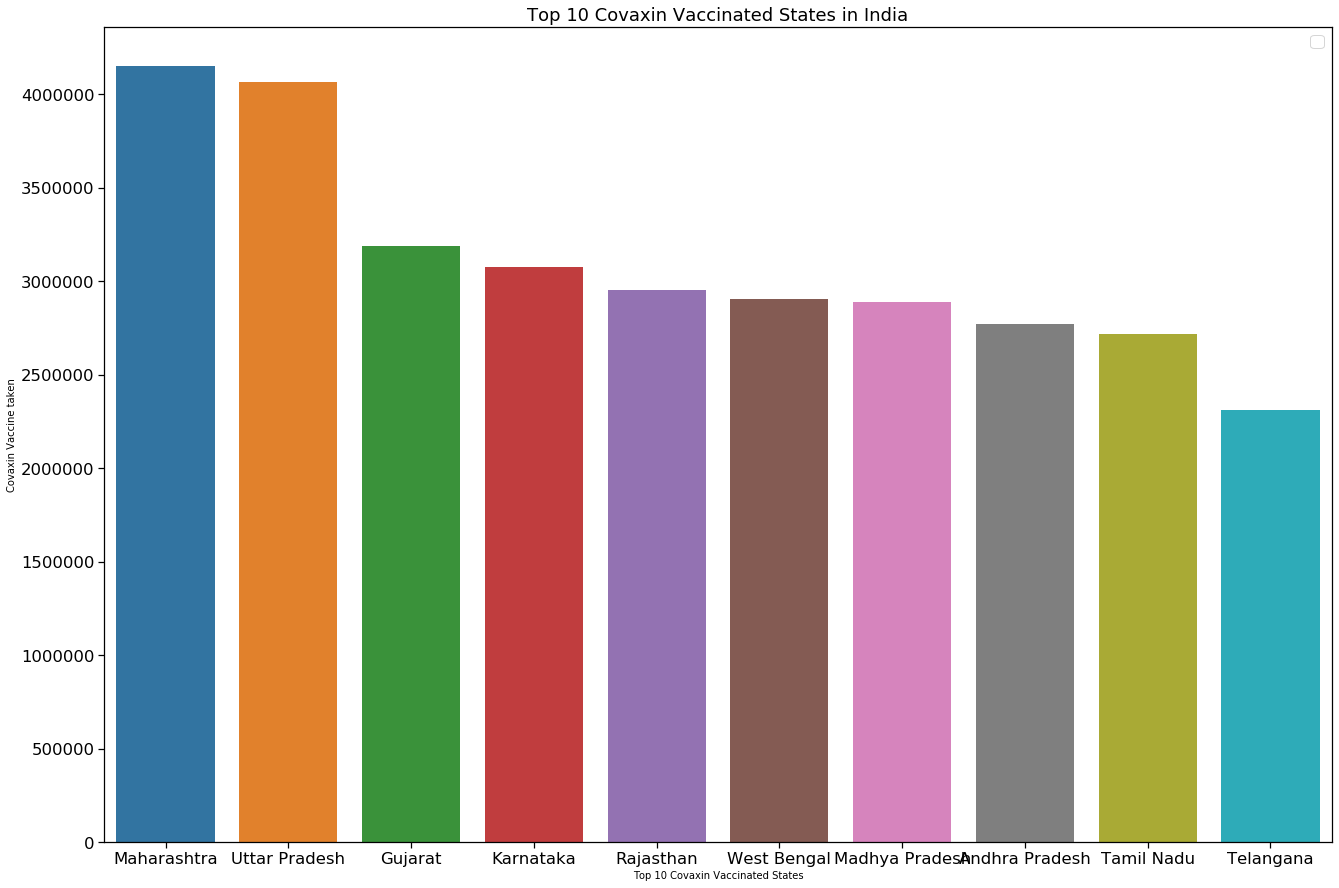

In [27]:
# Showing top 10 states that have taken covishield vaccination 
fig,ax = plt.subplots(figsize=(22, 15))
sb.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sb.barplot(x="State", y="Total Covaxin Administered", data=covaxin10)
ax.set_ylabel(ylabel = 'Covaxin Vaccine taken', fontsize = 10)
ax.set_xlabel(xlabel = 'Top 10 Covaxin Vaccinated States', fontsize = 10)
ax.set_title('Top 10 Covaxin Vaccinated States in India')
ax.legend();

Conclusion:-

Here also, Maharashtra and Uttar Pradesh are in top, but here we can see that Gujarat and Karnataka are third and fourth most covaxin vaccinated states unlike Rajasthan was fourth most in CoviShield.

# Gender wise vaccination analysis

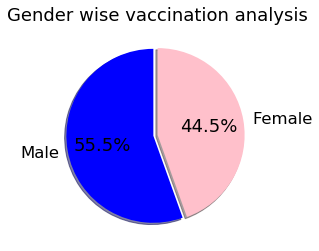

In [28]:
# Anaylsis of gender wise vaccination in India

male = covid_vaccine["Male"].max()         #Taking max of vaccinated male number because it is been added in each row
female = covid_vaccine["Female"].max()     #Taking max of vaccinated female number because it is been added in each row
gender_ratio = [male,female]
labels = 'Male','Female'
explode = (0.05,0)

plt.pie(gender_ratio, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', startangle=90,colors=['Blue','Pink'])
plt.title('Gender wise vaccination analysis')
plt.show()

Conclusion:-

So from above pie chart we found that 55.5% Male and 44.5% Female have been vaccinated in India till now.

# Age wise vaccination analysis

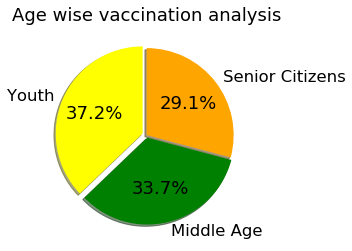

In [29]:
# Anaylsis of age wise vaccination in India

youth = covid_vaccine["Youth"].max()             #Taking maximum vaccinated youth(18-45 years) numbers in all states
middleage = covid_vaccine["MiddleAge"].max()     #Taking maximum vaccinated middleage(45-60 years) numbers in all states
senior = covid_vaccine["SeniorCitizen"].max()    #Taking maximum vaccinated senior citizen(60+ years) numbers in all states
age_ratio = [youth,middleage,senior]
labels = 'Youth','Middle Age','Senior Citizens'
explode = (0.05,0.03,0)

plt.pie(age_ratio, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', startangle=90,colors=['Yellow','Green','Orange'])
plt.title('Age wise vaccination analysis')
plt.show()

Conclusion:-

So from above pie chart, we found that Youth(18-45 years) (37.2%)people are most vaccinated, followed by Middle Age (33.7%) and senior citizens (29.1%).

# First Dose vs Second Dose

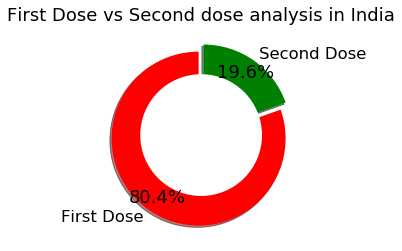

In [30]:
# Anaylsis of age wise vaccination in India

first_dose = covid_vaccine["First Dose Administered"].max()      #Taking Maximum first dose numbers in all states
second_dose = covid_vaccine["Second Dose Administered"].max()    #Taking Maximum second dose numbers in all states
dose_ratio = [first_dose,second_dose]
labels = 'First Dose','Second Dose'
explode = (0.05,0.05)

plt.pie(dose_ratio, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', startangle=90,colors=['Red','Green'],pctdistance=0.83)

# Adding Donu chart, first making a circle
circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(circle)

plt.title('First Dose vs Second dose analysis in India')
plt.show()


Conclusion:-

So from above donut chart, we found out that 80.4% have been vaccinated with first dose and 19.6% with second dose till now. In future people vaccinated with first dose will take second dose and they will get fully vaccinated

# Vaccination analysis of Madhya Pradesh

In [31]:
# Making a new dataframe consisting details of state Madhya pradesh for analysis

MP = covid_vaccine[covid_vaccine["State"]=="Madhya Pradesh"]

In [32]:
MP.head()

,Date,State,Total Doses Administered,First Dose Administered,Second Dose Administered,Male,Female,Total Covaxin Administered,Total CoviShield Administered,Youth,MiddleAge,SeniorCitizen,Total Vaccination
2652,2021-01-16,Madhya Pradesh,9435.0,9435.0,0.0,5066.0,4368.0,0.0,9435.0,NaN,NaN,NaN,9435.0
2653,2021-01-17,Madhya Pradesh,9435.0,9435.0,0.0,5066.0,4368.0,0.0,9435.0,NaN,NaN,NaN,9435.0
2654,2021-01-18,Madhya Pradesh,15934.0,15934.0,0.0,6799.0,9134.0,0.0,15934.0,NaN,NaN,NaN,15934.0
2655,2021-01-19,Madhya Pradesh,18409.0,18409.0,0.0,8067.0,10341.0,0.0,18409.0,NaN,NaN,NaN,18409.0
2656,2021-01-20,Madhya Pradesh,27769.0,27769.0,0.0,10968.0,16800.0,0.0,27769.0,NaN,NaN,NaN,27769.0


F:\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


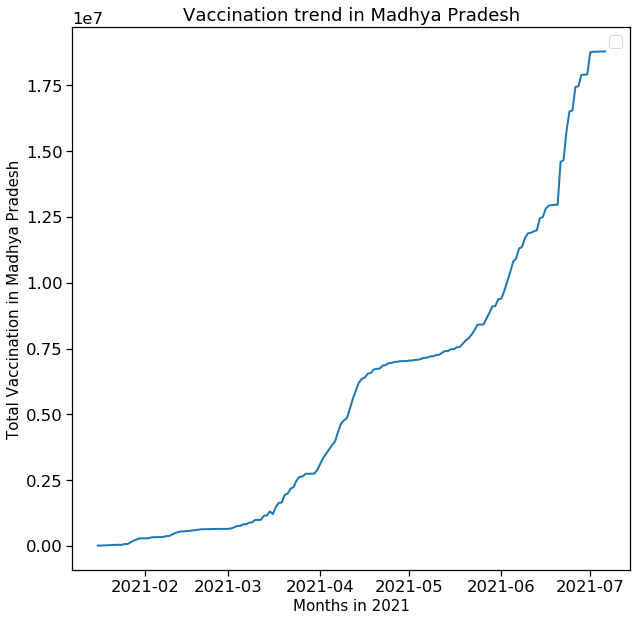

In [33]:
# Checking the vaccination trend in Madhya Pradesh till now

fig,ax = plt.subplots(figsize=(10, 10))
sb.lineplot(x=MP['Date'],y=MP['Total Vaccination'],dashes=True)

ax.set_ylabel(ylabel = 'Total Vaccination in Madhya Pradesh',fontsize = 15)
ax.set_xlabel(xlabel = 'Months in 2021', fontsize = 15)
ax.set_title('Vaccination trend in Madhya Pradesh')
ax.legend();

Conclusion:-

Vaccination has been increasing exponentially per month in Madhya Pradesh

# Checking percentage of people vaccinated as per population

In [34]:
population = 86800000    #8.68 crore people in Madhya Pradesh
total_vaccine = MP['Total Vaccination'].max()    #Because in every next row the previous vaccination detail is added
total_vaccine

18792034.0

In [35]:
print((total_vaccine/population)*100,'% people have been vaccinated as per population in Madhya Pradesh')

21.64980875576037 % people have been vaccinated as per population in Madhya Pradesh


Conclusion:- 

21.65% percent of people have been vaccinated in Madhya Pradesh

# How many male and female have been vaccinated in Madhya Pradesh

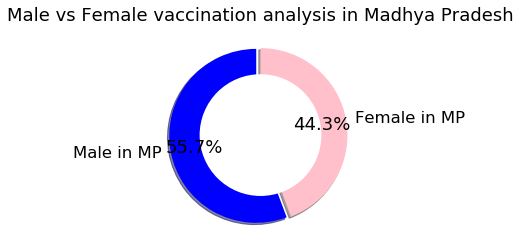

In [39]:
Male_MP = MP["Male"].max()      #Taking Maximum vaccinated male numbers in Madhya Pradesh
Female_MP = MP["Female"].max()    #Taking Maximum vaccinated female numbers in Madhya Pradesh
gender_mp = [Male_MP,Female_MP]
labels = 'Male in MP','Female in MP'
explode = (0.05,0)

plt.pie(gender_mp, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', startangle=90,colors=['Blue','Pink'],pctdistance=0.72)

# Adding Donu chart, first making a circle
circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(circle)

plt.title('Male vs Female vaccination analysis in Madhya Pradesh')
plt.show()


Conclusion:-

So from above donut chart, we found that 55.7% of Male and 44.3% of Female have been vaccinated in Madhya Pradesh.